### Plotting with Muli-Level Categorical Features

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
tips = sns.load_dataset("tips")

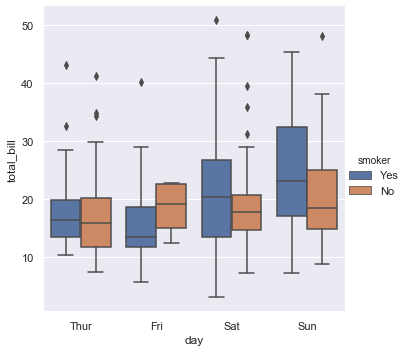

In [3]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

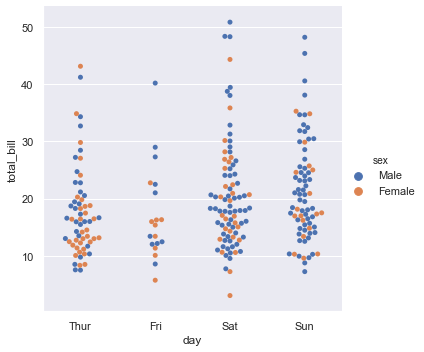

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

### Pivot Table

In [7]:
import pandas as pd

In [26]:
data = [
    ["Ia","S1",5],
    ["Ia","S1",2],
    ["Ia","S1",2],
    ["Ia","S2",15],
    ["Ib","S1",5],
    ["Ib","S1",1],
    ["Ib","S2",50]
]

df = pd.DataFrame(data, columns = ["Item", "Store", "Sales"])
df

,Item,Store,Sales
0,Ia,S1,5
1,Ia,S1,2
2,Ia,S1,2
3,Ia,S2,15
4,Ib,S1,5
5,Ib,S1,1
6,Ib,S2,50


In [27]:
pd.pivot_table(df, values='Sales', index="Item", columns="Store", aggfunc=np.sum)

Store,S1,S2
Item,,
Ia,9,15
Ib,6,50


In [28]:
pd.pivot_table(df, values='Sales', index="Item", columns="Store", aggfunc=np.mean)

Store,S1,S2
Item,,
Ia,3,15
Ib,3,50


In [29]:
pd.pivot_table(df, values='Sales', index="Item", columns="Store", aggfunc=np.median)

Store,S1,S2
Item,,
Ia,2,15
Ib,3,50


In [33]:
pd.pivot_table(df, values='Sales', index="Item", columns="Store", aggfunc="count")

Store,S1,S2
Item,,
Ia,3,1
Ib,2,1


### Rank Entire DataFrame

In [49]:
# let's see it in action
data = [
    [1,"A","1"],
    [4,"A","2"],
    [1,"A","3"],
    [1,"A","4"],
    [4,"A","5"],
    [1,"A","6"],
    [11,"B","1"],
    [4,"B","2"],
    [15,"B","3"],
    [8,"B","4"],
    [7,"B","5"],
    [4,"B","6"]
]

df = pd.DataFrame(data)
df.columns = ["val", "id", "period"]
df

,val,id,period
0,1,A,1
1,4,A,2
2,1,A,3
3,1,A,4
4,4,A,5
5,1,A,6
6,11,B,1
7,4,B,2
8,15,B,3
9,8,B,4


In [50]:
# min value is 1 second lowest value of "val" is 2 and so on
# note how ties work, if two items are tired for lowest value
# we get two rank 1s and no rank 2
df["rank_min"] = df["val"].rank(method = "min")

# same as min, but uses max vs min
df["rank_max"] = df["val"].rank(method = "max")

In [51]:
df

,val,id,period,rank_min,rank_max
0,1,A,1,1.0,4.0
1,4,A,2,5.0,8.0
2,1,A,3,1.0,4.0
3,1,A,4,1.0,4.0
4,4,A,5,5.0,8.0
5,1,A,6,1.0,4.0
6,11,B,1,11.0,11.0
7,4,B,2,5.0,8.0
8,15,B,3,12.0,12.0
9,8,B,4,10.0,10.0
